# Metas do Objetivo 11

* **11.1** Até 2030, garantir o acesso de todos a habitação segura, adequada e a preço acessível, e aos serviços básicos e urbanizar as favelas	
* **11.2** Até 2030, proporcionar o acesso a sistemas de transporte seguros, acessíveis, sustentáveis e a preço acessível para todos, melhorando a segurança rodoviária por meio da expansão dos transportes públicos, com especial atenção para as necessidades das pessoas em situação de vulnerabilidade, mulheres, crianças, pessoas com deficiência e idosos	
* **11.3** Até 2030, aumentar a urbanização inclusiva e sustentável, e a capacidade para o planejamento e a gestão participativa, integrada e sustentável dos assentamentos humanos, em todos os países	
* **11.4** Fortalecer esforços para proteger e salvaguardar o patrimônio cultural e natural do mundo	
* **11.5** Até 2030, reduzir significativamente o número de mortes e o número de pessoas afetadas por catástrofes e diminuir substancialmente as perdas econômicas diretas causadas por elas em relação ao produto interno bruto global, incluindo os desastres relacionados à água, com o foco em proteger os pobres e as pessoas em situação de vulnerabilidade	
* **11.6** Até 2030, reduzir o impacto ambiental negativo per capita das cidades, inclusive prestando especial atenção à qualidade do ar, gestão de resíduos municipais e outros	
* **11.7** Até 2030, proporcionar o acesso universal a espaços públicos seguros, inclusivos, acessíveis e verdes, em particular para as mulheres e crianças, pessoas idosas e pessoas com deficiência	
* **11.a** Apoiar relações econômicas, sociais e ambientais positivas entre áreas urbanas, periurbanas e rurais, reforçando o planejamento nacional e regional de desenvolvimento	
* **11.b** Até 2020, aumentar substancialmente o número de cidades e assentamentos humanos adotando e implementando políticas e planos integrados para a inclusão, a eficiência dos recursos, mitigação e adaptação à mudança do clima, a resiliência a desastres; e desenvolver e implementar, de acordo com o Marco de Sendai para a Redução do Risco de Desastres 2015-2030, o gerenciamento holístico do risco de desastres em todos os níveis	
* **11.c** Apoiar os países menos desenvolvidos, inclusive por meio de assistência técnica e financeira, para construções sustentáveis e robustas, utilizando materiais locais

In [3]:
import pandas as pd
from IPython.display import display
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Analisando o IEG-M, podemos ver que os índices que se relacionam com o mesmo são o i-Planejamento, i-Amb e i-Cidade.

In [46]:
iegm_scores = pd.read_csv("../data/iegm/IEGM-notas.csv")

In [47]:
iegm_scores.head()

,Munícipio,Região Administrativa,Ano,Porte,i-Educ,i-Saúde,i-Planejamento,i-Fiscal,i-Amb,i-Cidade,i-Gov-TI,IEGM,Receita,Despesa,Habitantes
0,Adamantina,Região Administrativa de Presidente Prudente,2014,Médio,A,A,C,B,A,C,B,B,"R$ 105,070,271.12","R$ 107,526,432.80",33862
1,Adamantina,Região Administrativa de Presidente Prudente,2015,Médio,B+,B+,B+,B,B,C,C,B,"R$ 115,400,733.51","R$ 127,982,995.60",33879
2,Adamantina,Região Administrativa de Presidente Prudente,2016,Médio,C+,B,B,B,B,C,C+,B,"R$ 131,885,361.56","R$ 121,733,123.12",33882
3,Adamantina,Região Administrativa de Presidente Prudente,2017,Médio,B,B+,B,B+,B+,C,B,B,"R$ 152,247,951.90","R$ 137,083,669.93",35139
4,Adolfo,Região Administrativa de São José do Rio Preto,2014,Muito Pequeno,B+,A,A,C+,B+,C,C+,B+,"R$ 18,718,870.00","R$ 20,468,440.31",3512


In [48]:
clusterized_cities_parameters = pd.read_csv("../data/generated/cluster_parameters.csv", encoding="windows-1254")

In [49]:
clusterized_cities = pd.read_csv("../data/generated/clusterized_cities.csv", encoding="windows-1254")

In [50]:
cluster_data = clusterized_cities_parameters.merge(clusterized_cities)

In [51]:
cluster_data.drop('Unnamed: 0', axis=1, inplace=True)

In [52]:
cluster_data.head()

,municipio,arrecadacao,habitantes,idhm,cluster_labels
0,Adamantina,1.668520e+08,33797.0,0.790,4
1,Adolfo,2.581124e+07,3557.0,0.730,2
2,Aguaí,8.606935e+07,32148.0,0.715,1
3,Agudos,1.493109e+08,34524.0,0.745,2
4,Alambari,2.307959e+07,4884.0,0.712,1


In [53]:
iegm_scores.rename(columns={"Munícipio": "municipio"}, inplace=True)

In [54]:
final_df = iegm_scores.merge(cluster_data)

In [56]:
final_df = final_df[['municipio', 'IEGM', 'i-Planejamento', 'i-Amb', 'i-Cidade', 'arrecadacao', 'habitantes', 'idhm', 'cluster_labels']]

Com os clusters obtidos no notebook *Clusterizando cidades*, observamos os clusters formados, com base na arrecadação, no número de habitantes e no IDH. Observamos que, enquanto uma maior arrecadação está correlacionada com um número maior de habitantes (o que faz total sentido), nem sempre o IDH segue a mesma tendência.

In [75]:
grouped_df = final_df.groupby('cluster_labels').mean().sort_values('arrecadacao', ascending=False)

In [97]:
grouped_df

,arrecadacao,habitantes,idhm
cluster_labels,,,
7,4.462517e+09,1.022518e+06,0.791000
6,2.623530e+09,5.243312e+05,0.805500
3,1.020709e+09,3.069829e+05,0.765100
5,9.385177e+08,1.579851e+05,0.792375
4,2.596934e+08,7.097414e+04,0.787649
2,7.835404e+07,2.111833e+04,0.742033
1,3.835376e+07,1.081218e+04,0.696368


Tentaremos visualizar, agora, como esses fatores se relacionam com a performance no IEG-M.

In [84]:
final_df.head()

,municipio,IEGM,i-Planejamento,i-Amb,i-Cidade,arrecadacao,habitantes,idhm,cluster_labels
0,Adamantina,B,C,A,C,1.668520e+08,33797.0,0.79,4
1,Adamantina,B,B+,B,C,1.668520e+08,33797.0,0.79,4
2,Adamantina,B,B,B,C,1.668520e+08,33797.0,0.79,4
3,Adamantina,B,B,B+,C,1.668520e+08,33797.0,0.79,4
4,Adolfo,B+,A,B+,C,2.581124e+07,3557.0,0.73,2


In [86]:
conversion_dict = {"C": 1, "C+": 2, "B": 3, "B+": 4, "A": 5}
for column in ['IEGM', 'i-Planejamento', 'i-Amb', 'i-Cidade']:
    final_df[column] = final_df[column].apply(lambda x: conversion_dict[x])

In [87]:
final_df.head()

,municipio,IEGM,i-Planejamento,i-Amb,i-Cidade,arrecadacao,habitantes,idhm,cluster_labels
0,Adamantina,3,1,5,1,1.668520e+08,33797.0,0.79,4
1,Adamantina,3,4,3,1,1.668520e+08,33797.0,0.79,4
2,Adamantina,3,3,3,1,1.668520e+08,33797.0,0.79,4
3,Adamantina,3,3,4,1,1.668520e+08,33797.0,0.79,4
4,Adolfo,4,5,4,1,2.581124e+07,3557.0,0.73,2


# Cluster 7

In [130]:
current_cluster = grouped_df.loc[7]
print(f"Arrecadação média: {round(current_cluster['arrecadacao'], 3)}, " 
          f"Número de Habitantes médio: {round(current_cluster['habitantes'], 3)}, "
          f"IDHM médio: {round(current_cluster['idhm'], 3)}")

Arrecadação média: 4462516910.92, Número de Habitantes médio: 1022518.333, IDHM médio: 0.791


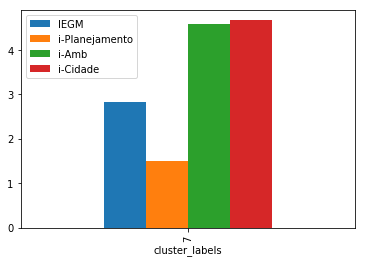

In [131]:
temp_df = final_df[final_df.cluster_labels == 7].groupby('cluster_labels').mean()
display(temp_df[['IEGM', 'i-Planejamento', 'i-Amb', 'i-Cidade']].plot(kind='bar'))

# Cluster 6

In [132]:
current_cluster = grouped_df.loc[6]
print(f"Arrecadação média: {round(current_cluster['arrecadacao'], 3)}, " 
          f"Número de Habitantes médio: {round(current_cluster['habitantes'], 3)}, "
          f"IDHM médio: {round(current_cluster['idhm'], 3)}")

Arrecadação média: 2623529664.421, Número de Habitantes médio: 524331.25, IDHM médio: 0.805


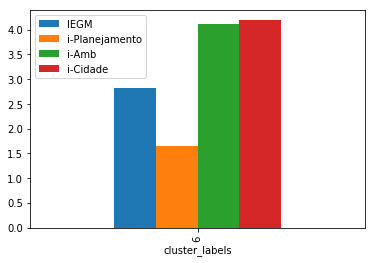

In [133]:
temp_df = final_df[final_df.cluster_labels == 6].groupby('cluster_labels').mean()
display(temp_df[['IEGM', 'i-Planejamento', 'i-Amb', 'i-Cidade']].plot(kind='bar'))

# Cluster 3

In [134]:
current_cluster = grouped_df.loc[3]
print(f"Arrecadação média: {round(current_cluster['arrecadacao'], 3)}, " 
          f"Número de Habitantes médio: {round(current_cluster['habitantes'], 3)}, "
          f"IDHM médio: {round(current_cluster['idhm'], 3)}")

Arrecadação média: 1020708581.823, Número de Habitantes médio: 306982.9, IDHM médio: 0.765


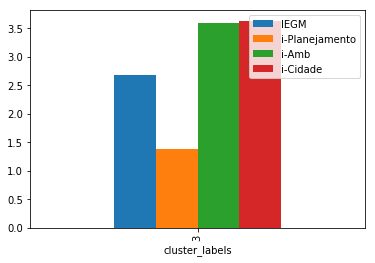

In [136]:
temp_df = final_df[final_df.cluster_labels == 3].groupby('cluster_labels').mean()
temp_df[['IEGM', 'i-Planejamento', 'i-Amb', 'i-Cidade']].plot(kind='bar')

# Cluster 5

In [137]:
current_cluster = grouped_df.loc[5]
print(f"Arrecadação média: {round(current_cluster['arrecadacao'], 3)}, " 
          f"Número de Habitantes médio: {round(current_cluster['habitantes'], 3)}, "
          f"IDHM médio: {round(current_cluster['idhm'], 3)}")

Arrecadação média: 938517675.542, Número de Habitantes médio: 157985.062, IDHM médio: 0.792


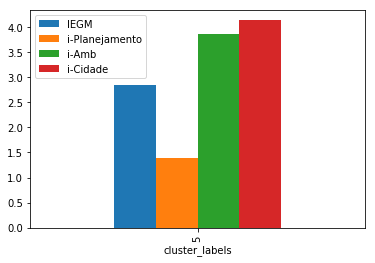

In [138]:
temp_df = final_df[final_df.cluster_labels == 5].groupby('cluster_labels').mean()
display(temp_df[['IEGM', 'i-Planejamento', 'i-Amb', 'i-Cidade']].plot(kind='bar'))

# Cluster 4

In [139]:
current_cluster = grouped_df.loc[4]
print(f"Arrecadação média: {round(current_cluster['arrecadacao'], 3)}, " 
          f"Número de Habitantes médio: {round(current_cluster['habitantes'], 3)}, "
          f"IDHM médio: {round(current_cluster['idhm'], 3)}")

Arrecadação média: 259693440.015, Número de Habitantes médio: 70974.14, IDHM médio: 0.788


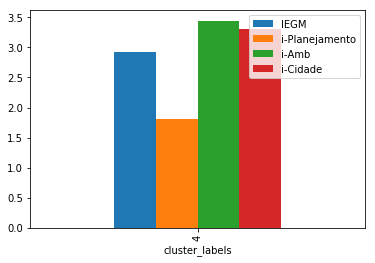

In [140]:
temp_df = final_df[final_df.cluster_labels == 4].groupby('cluster_labels').mean()
display(temp_df[['IEGM', 'i-Planejamento', 'i-Amb', 'i-Cidade']].plot(kind='bar'))

# Cluster 2

In [141]:
current_cluster = grouped_df.loc[2]
print(f"Arrecadação média: {round(current_cluster['arrecadacao'], 3)}, " 
          f"Número de Habitantes médio: {round(current_cluster['habitantes'], 3)}, "
          f"IDHM médio: {round(current_cluster['idhm'], 3)}")

Arrecadação média: 78354039.41, Número de Habitantes médio: 21118.334, IDHM médio: 0.742


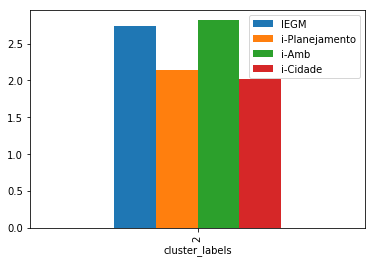

In [142]:
temp_df = final_df[final_df.cluster_labels == 2].groupby('cluster_labels').mean()
display(temp_df[['IEGM', 'i-Planejamento', 'i-Amb', 'i-Cidade']].plot(kind='bar'))

# Cluster 1

In [143]:
current_cluster = grouped_df.loc[1]
print(f"Arrecadação média: {round(current_cluster['arrecadacao'], 3)}, " 
          f"Número de Habitantes médio: {round(current_cluster['habitantes'], 3)}, "
          f"IDHM médio: {round(current_cluster['idhm'], 3)}")

Arrecadação média: 38353761.633, Número de Habitantes médio: 10812.176, IDHM médio: 0.696


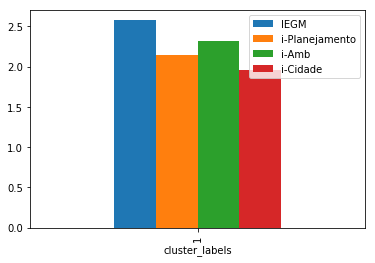

In [144]:
temp_df = final_df[final_df.cluster_labels == 1].groupby('cluster_labels').mean()
display(temp_df[['IEGM', 'i-Planejamento', 'i-Amb', 'i-Cidade']].plot(kind='bar'))

# O que tirar dessa análise?

Primeiramente, é importante colocar que o objetivo de análises como essa não é comparar cidades de maneira competitiva, mas sim observar como a performance do IEG-M se transforma de acordo com a distribuição de outros fatores. Será que cidades menores e menos privilegiadas estão conseguindo caminhar em direção ao ODS 11 assim como as maiores cidades do estado? Essa informação é importante para identificar desafios que possam impedir que o ODS 11 seja amplamente cumprido, e pode nortear políticas públicas, inclusive de repasses de tributos estaduais, para que a adoção seja a mais ampla e democrática possível.

Notamos, primeiramente, que os índices com melhores performances entre todos são i-Amb e i-Cidade, sendo, na maioria dos clusters, maiores que os outros índices, na média. De maneira geral, também observamos que o i-Planejamento é geralmente o menor entre todos os índices, indicando esse desfalque nas cidades.

Analisando superficialmente, vemos que, com exceção dos clusters 1 e 2, todos os clusters aparentam manter uma média razoável de todos os índices, que parece estar mais relacionada com o número de habitantes/arrecadação do que com o IDH. No entanto, ao analisar os dois clusters "menos privilegiados", vemos que os índices também acabam sendo menores.

A análise feita aqui ainda é muito superficial, mas podemos usar os clusters como ponto de partida para analisar melhor a correlação entre esses dados, e até criar uma tela do Dashboard para uso interno do TCE ou de autoridades competentes do estado para justamente observar esses dados e tentar compensar de alguma forma a "dificuldade" de cidades menores de cumprir com os objetivos do ODS 11.